## Датасет: [Tesla Insider Trading](https://www.kaggle.com/datasets/ilyaryabov/tesla-insider-trading).

### Описание датасета:

Датасет представляет собой выборку операций с ценными бумагами компании Tesla, совершённых инсайдерами, и является частью более крупного проекта "Insider Trading S&P500 – Inside Info". Данные охватывают транзакции с участием крупных акционеров и должностных лиц компании, включая такие операции, как покупка, продажа и опционы, начиная с 10 ноября 2021 года и до 27 июля 2022 года.

---

### Анализ сведений:

**Проблемная область:**
Проблемная область данного датасета касается анализа инсайдерских сделок в публичных компаниях, а также их влияния на ценообразование акций. Инсайдерские транзакции, совершаемые людьми с доступом к непубличной информации (такими как руководители, крупные акционеры или члены совета директоров), могут быть индикаторами будущих изменений стоимости акций. Исследование таких транзакций помогает понять, как информация внутри компании отражается в действиях ключевых участников, и может выявить паттерны поведения, которые влияют на рынки.

**Актуальность:**
Анализ инсайдерских сделок становится особенно важным в условиях высокой волатильности рынка и неопределенности. Инвесторы, аналитики и компании используют такие данные, чтобы лучше понимать сигналы от крупных акционеров и должностных лиц. Действия инсайдеров, такие как покупки и продажи акций, нередко рассматриваются как индикаторы доверия к компании, что может оказывать значительное влияние на рыночные ожидания и прогнозы.

**Объекты наблюдений:**
Объектами наблюдений в датасете являются инсайдеры компании Tesla — лица, имеющие значительное влияние на управление и информацию компании. Каждый объект характеризуется различными параметрами, включая должность, тип транзакции, количество акций и общую стоимость сделок.

**Атрибуты объектов:**
- Insider Trading: ФИО лица, совершившего транзакцию.
- Relationship: Должность или статус данного лица в компании Tesla.
- Date: Дата завершения транзакции.
- Transaction: Тип транзакции.
- Cost: Цена одной акции на момент совершения транзакции.
- Shares: Количество акций, участвующих в транзакции.
- Value ($): Общая стоимость транзакции в долларах США.
- Shares Total: Общее количество акций, принадлежащих этому лицу после завершения данной транзакции.
- SEC Form 4: Дата записи транзакции в форме SEC Form 4, обязательной для отчётности о сделках инсайдеров.

---

### Выгрузка данных из файла в DataFrame:

In [137]:
import pandas as pd
from pandas import DataFrame


df: DataFrame = pd.read_csv("..//static//csv//TSLA.csv")

# Преобразование типов данных
df["Insider Trading"] = df["Insider Trading"].astype("category")                             # Преобразование в категорию
df["Relationship"] = df["Relationship"].astype("category")                                   # Преобразование в категорию
df["Transaction"] = df["Transaction"].astype("category")                                     # Преобразование в категорию
df["Cost"] = pd.to_numeric(df["Cost"], errors="coerce")                                      # Преобразование в float
df["Shares"] = pd.to_numeric(df["Shares"].str.replace(",", ""), errors="coerce")             # Преобразование в float с удалением запятых
df["Value ($)"] = pd.to_numeric(df["Value ($)"].str.replace(",", ""), errors="coerce")       # Преобразование в float с удалением запятых
df["Shares Total"] = pd.to_numeric(df["Shares Total"].str.replace(",", ""), errors="coerce") # Преобразование в float с удалением запятых

### Краткая информация о DataFrame:

In [138]:
# Краткая информация о DataFrame
df.info()

# Статистическое описание числовых столбцов
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Insider Trading  156 non-null    category
 1   Relationship     156 non-null    category
 2   Date             156 non-null    object  
 3   Transaction      156 non-null    category
 4   Cost             156 non-null    float64 
 5   Shares           156 non-null    int64   
 6   Value ($)        156 non-null    int64   
 7   Shares Total     156 non-null    int64   
 8   SEC Form 4       156 non-null    object  
dtypes: category(3), float64(1), int64(3), object(2)
memory usage: 8.6+ KB


count          mean           std    min          25%  \
Cost          156.0  4.787856e+02  4.489229e+02    0.0      50.5225   
Shares        156.0  5.404666e+05  1.530835e+06  121.0    3500.0000   
Value ($)     156.0  1.818582e+08  4.131734e+08    0.0  271008.0000   
Shares Total  156.0  3.347679e+07  9.553593e+07   49.0   25103.5000   

                      50%           75%           max  
Cost              240.225  9.341075e+02  1.171040e+03  
Shares          10500.000  3.017978e+05  1.192000e+07  
Value ($)     2026823.000  1.487132e+08  2.278695e+09  
Shares Total    73488.000  1.507274e+06  4.554674e+08

### Выбор входных данных и целевого признака:

**Входные данные:**

- Transaction (Тип транзакции): Категориальная переменная, указывающая на тип операции (Sale, Option Exercise).
- Shares (Количество акций): Числовая переменная, указывающая количество акций в транзакции.
- Value ($): Числовая переменная, представляющая общую стоимость транзакции.

**Целевой признак:**

Cost (Цена акции): Числовая переменная, показывающая стоимость одной акции на момент совершения транзакции.

---

### Определение лингвистических переменных:

**Лингвистическая переменная** – это переменная, значениями которой являются слова или фразы вместо чисел. Она используется в нечеткой логике и теории нечетких множеств для описания понятий, которые нельзя точно выразить числовыми значениями.

Для каждой переменной определим количество термов, типы и параметры функций принадлежности.

In [139]:
import numpy as np
from skfuzzy import control as ctrl


transaction = ctrl.Antecedent(np.arange(0, 2, 1), "Transaction")
shares = ctrl.Antecedent(np.arange(0, 12000000, 1), "Shares")
value = ctrl.Antecedent(np.arange(0, 2.3e9, 1e6), "Value")
cost = ctrl.Consequent(np.arange(0, 1200, 1), "Cost")

### Определение нечетких переменных:

d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


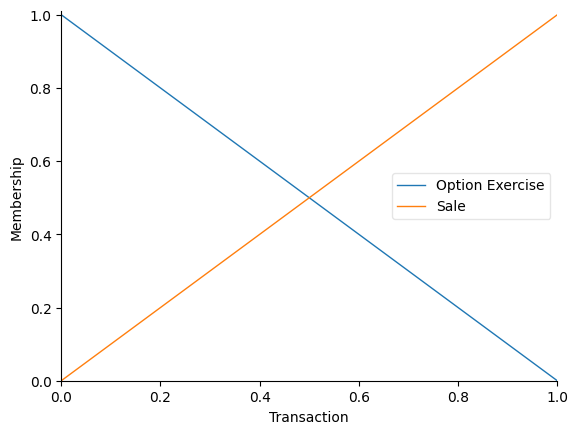

d:\ULSTU\Семестр 5\AIM-PIbd-31-Masenkin-M-S\aimenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


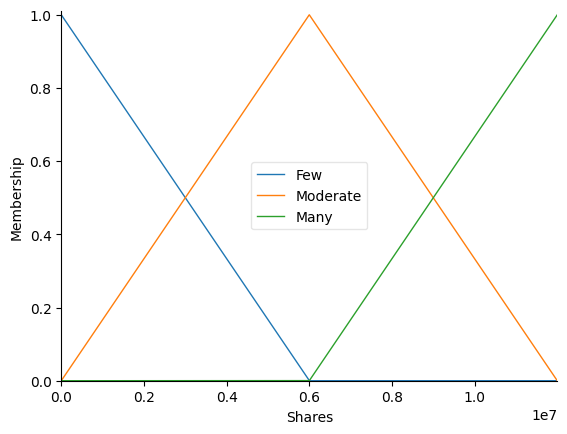

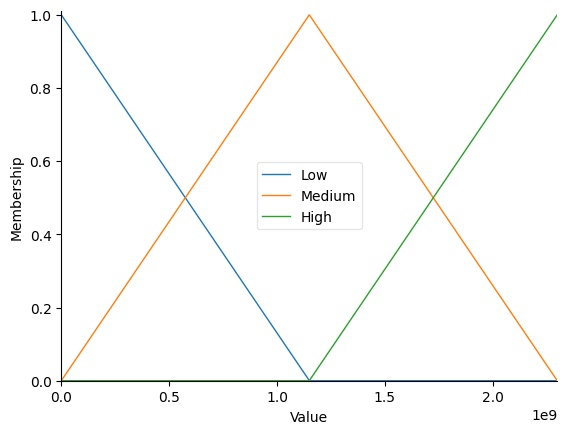

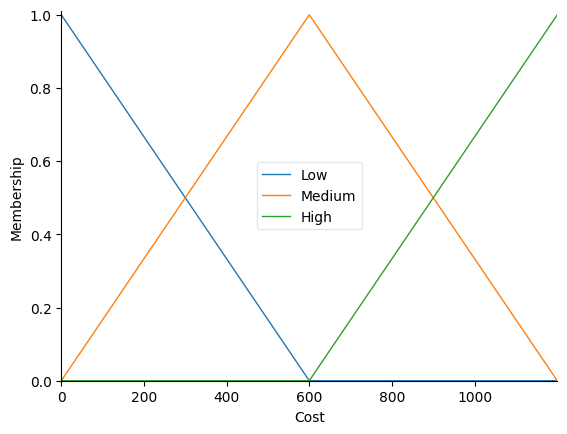

In [140]:
import skfuzzy as fuzz


transaction["Option Exercise"] = fuzz.trimf(transaction.universe, [0, 0, 1])
transaction["Sale"] = fuzz.trimf(transaction.universe, [0, 1, 1])
transaction.view()

# shares["Few"] = fuzz.zmf(shares.universe, 0, 20000)
# shares["Moderate"] = fuzz.trimf(shares.universe, [10000, 50000, 500000])
# shares["Many"] = fuzz.smf(shares.universe, 400000, 12000000)
shares.automf(3, names=["Few", "Moderate", "Many"])
shares.view()

# value["Low"] = fuzz.zmf(value.universe, 0, 5e7)
# value["Medium"] = fuzz.trimf(value.universe, [5e7, 1e8, 1e9])
# value["High"] = fuzz.smf(value.universe, 1e9, 2.3e9)
value.automf(3, names=["Low", "Medium", "High"])
value.view()

# cost["Low"] = fuzz.zmf(cost.universe, 0, 300)
# cost["Medium"] = fuzz.trimf(cost.universe, [250, 500, 750])
# cost["High"] = fuzz.smf(cost.universe, 700, 1200)
cost.automf(3, names=["Low", "Medium", "High"])
cost.view()

### Определение нечётких правил:

In [141]:
rule1 = ctrl.Rule(transaction["Option Exercise"] & shares["Few"] & value["Low"], cost["Low"])
rule2 = ctrl.Rule(transaction["Option Exercise"] & shares["Few"] & value["Medium"], cost["Low"])
rule3 = ctrl.Rule(transaction["Option Exercise"] & shares["Few"] & value["High"], cost["Medium"])
rule4 = ctrl.Rule(transaction["Option Exercise"] & shares["Moderate"] & value["Low"], cost["Low"])
rule5 = ctrl.Rule(transaction["Option Exercise"] & shares["Moderate"] & value["Medium"], cost["Medium"])
rule6 = ctrl.Rule(transaction["Option Exercise"] & shares["Moderate"] & value["High"], cost["High"])
rule7 = ctrl.Rule(transaction["Option Exercise"] & shares["Many"] & value["Low"], cost["Medium"])
rule8 = ctrl.Rule(transaction["Option Exercise"] & shares["Many"] & value["Medium"], cost["High"])
rule9 = ctrl.Rule(transaction["Option Exercise"] & shares["Many"] & value["High"], cost["High"])

rule10 = ctrl.Rule(transaction["Sale"] & shares["Few"] & value["Low"], cost["Low"])
rule11 = ctrl.Rule(transaction["Sale"] & shares["Few"] & value["Medium"], cost["Low"])
rule12 = ctrl.Rule(transaction["Sale"] & shares["Few"] & value["High"], cost["Medium"])
rule13 = ctrl.Rule(transaction["Sale"] & shares["Moderate"] & value["Low"], cost["Low"])
rule14 = ctrl.Rule(transaction["Sale"] & shares["Moderate"] & value["Medium"], cost["Medium"])
rule15 = ctrl.Rule(transaction["Sale"] & shares["Moderate"] & value["High"], cost["High"])
rule16 = ctrl.Rule(transaction["Sale"] & shares["Many"] & value["Low"], cost["Medium"])
rule17 = ctrl.Rule(transaction["Sale"] & shares["Many"] & value["Medium"], cost["High"])
rule18 = ctrl.Rule(transaction["Sale"] & shares["Many"] & value["High"], cost["High"])
# Всё ещё не нравится

### Создание нечеткой системы:

In [142]:
fuzzy_rules: list[ctrl.Rule] = [
    rule1,
    rule2,
    rule3,
    rule4,
    rule5,
    rule6,
    rule7,
    rule8,
    rule9,
    rule10,
    rule11,
    rule12,
    rule13,
    rule14,
    rule15,
    rule16,
    rule17,
    rule18,
]

# Создание системы управления
cost_ctrl = ctrl.ControlSystem(fuzzy_rules)

# Стимуляция системы управления
cost_sim = ctrl.ControlSystemSimulation(cost_ctrl)

fuzzy_rules

[IF (Transaction[Option Exercise] AND Shares[Few]) AND Value[Low] THEN Cost[Low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (Transaction[Option Exercise] AND Shares[Few]) AND Value[Medium] THEN Cost[Low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (Transaction[Option Exercise] AND Shares[Few]) AND Value[High] THEN Cost[Medium]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (Transaction[Option Exercise] AND Shares[Moderate]) AND Value[Low] THEN Cost[Low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (Transaction[Option Exercise] AND Shares[Moderate]) AND Value[Medium] THEN Cost[Medium]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (Transaction[Option Exercise] AND Shares[Moderate]) AND Value[High] THEN Cost[High]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (Transaction[Option Exercise] AND Shares[Many]) AND Value[Low] THE

### Тестирование нечёткой системы:

In [143]:
from sklearn.model_selection import train_test_split


# Функция для предсказания значений
def predict_value(row):
    cost_sim.input["Transaction"] = row["Transaction"]
    cost_sim.input["Shares"] = row["Shares"]
    cost_sim.input["Value"] = row["Value ($)"]
    cost_sim.compute()
    return cost_sim.output["Cost"]


# Выбор нужных столбцов
data: DataFrame = df[["Transaction", "Shares", "Value ($)", "Cost"]]

# Разделение данных на обучающую и тестовую выборки (80% / 20%)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Применение модели к обучающей выборке
train_data["Predicted cost"] = train_data.apply(predict_value, axis=1)
display(train_data.head(15))

# Применение модели к тестовой выборке
test_data["Predicted cost"] = test_data.apply(predict_value, axis=1)
display(test_data.head(15))

Transaction   Shares  Value ($)     Cost  Predicted cost
56   Option Exercise     2500     138300    55.32      200.001889
138  Option Exercise  2152681   13432729     6.24      236.449927
123  Option Exercise  2134440   13318906     6.24      235.991667
128             Sale   543452  555171415  1021.56      353.734614
127             Sale   390639  408039939  1044.54      304.168211
66              Sale     3500    2527350   722.10      200.649273
42   Option Exercise     8228          0     0.00      199.833987
26              Sale    10500    1885485   179.57      202.119571
134  Option Exercise     3283          0     0.00      199.833671
79              Sale   215528  212841259   987.53      252.897330
131             Sale      917     899091   980.47      200.047433
36              Sale     3750    1127212   300.59      200.706593
75   Option Exercise     3500     219520    62.72      200.100676
22   Option Exercise    16871          0     0.00      199.835187
135  Option Exercise  2133441   13312672     6.24      235.966640

Transaction   Shares   Value ($)     Cost  Predicted cost
96   Option Exercise     3500      219520    62.72      200.100676
69              Sale      121      107447   887.99      199.861821
82              Sale  2258486  2007978676   889.08      619.839689
76              Sale     3500     3147970   899.42      200.649805
114             Sale   340564   333647031   979.69      286.706558
29              Sale  9650000  2012758726   208.58      753.891218
94   Option Exercise    25000     1309500    52.38      201.426112
132  Option Exercise     1786           0     0.00      199.833629
93   Option Exercise     1786           0     0.00      199.833629
139             Sale   126471   148102963  1171.04      231.142091
19              Sale     3768      670935   178.07      200.648862
90              Sale     1535     1297675   845.39      200.191485
15              Sale  6870000  1088011570   158.37      604.702496
125             Sale   764980   738683277   965.62      363.950049
24              Sale     3750      710625   189.50      200.697003

### Оценка результатов на метриках:

~ Спустя n часов, проведенных в попытках улучшить показатели метрик и танцев с бубном вокруг настройки параметров лингвистических переменных я сдался.

In [144]:
import math
from typing import Union
from numpy import ndarray

from sklearn import metrics


metrics_results: dict[str, Union[float, ndarray]] = {}

metrics_results["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(train_data["Cost"], train_data["Predicted cost"])
)
metrics_results["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(test_data["Cost"], test_data["Predicted cost"])
)
metrics_results["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(test_data["Cost"], test_data["Predicted cost"])
)
metrics_results["R2_test"] = metrics.r2_score(  # type: ignore
    test_data["Cost"], test_data["Predicted cost"]
)

metrics_results

{'RMSE_train': 510.9053801945241,
 'RMSE_test': 454.5448906860201,
 'RMAE_test': 19.12051761053488,
 'R2_test': -0.16291982992374576}